# Predicting Housing Prices with Polynomial Features

The purpose of this assignment is to examine how varying complexity, using polynomial features, of a linear regression model affects the error. Specifically, we will try to predict housing prices using the square feet living space and other features that are square feet living space values raised to higher powers.

The data set consists of housing data from King county Washington (Seattle area).

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

In [11]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
house_df=pd.read_csv("kc_house_data.csv",dtype=dtype_dict)
train_df=pd.read_csv("wk3_kc_house_train_data.csv",dtype=dtype_dict)
validation_df=pd.read_csv("wk3_kc_house_valid_data.csv",dtype=dtype_dict)
test_df=pd.read_csv("wk3_kc_house_test_data.csv",dtype=dtype_dict)
set_1=pd.read_csv("wk3_kc_house_set_1_data.csv",dtype=dtype_dict)
set_2=pd.read_csv("wk3_kc_house_set_2_data.csv",dtype=dtype_dict)
set_3=pd.read_csv("wk3_kc_house_set_3_data.csv",dtype=dtype_dict)
set_4=pd.read_csv("wk3_kc_house_set_4_data.csv",dtype=dtype_dict)

In [24]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [17]:
#Define a function that takes an array feature and a maximal degree, then returns a data frame with the original feature as
#the first column, then each subsequent column is the data of the first raised to increasing integer powers, up to the
#maximal degree
def polynomial_df(series,maxdegree):
    poly_df=pd.DataFrame({"x":series})
    for degree in range(2,maxdegree+1):
        poly_df["x^"+str(degree)]=series**degree
    return poly_df

In [22]:
#Sort the sales data by square feet of living space. In the event of a tie, sort secondly by price
sales=house_df.sort_values(["sqft_living","price"])

In [29]:
#Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’
poly1_data=polynomial_df(sales["sqft_living"],1)

#Add sales[‘price’] to poly1_data as this will be our output variable
poly1_data["price"]=sales["price"]

Use the linear regression model to predict the slope and intercept of this data

In [33]:
model1=LinearRegression().fit(np.array(poly1_data["x"]).reshape(-1,1),poly1_data["price"])

In [36]:
intercept1=model1.intercept_
slope1=model1.coef_[0]
print("Intercept: {}\nSlope: {}".format(intercept1,slope1))

Intercept: -43580.74309447431
Slope: 280.6235678974484


### Graph

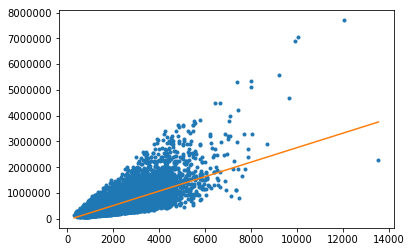

In [44]:
x=poly1_data["x"]
y=poly1_data.price
y1=model1.predict(np.array(poly1_data["x"]).reshape(-1,1))
plt.plot(x,y,".",x,y1,"-")

## Higher Order Polynomials
Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [42]:
#Make a 2 degree polynomial data frame with sales[‘sqft_living’] as the the feature. Call it ‘poly2_data’
poly2_data=polynomial_df(sales["sqft_living"],2)
#Add sales[‘price’] to poly2_data as this will be our output variable
poly2_data["price"]=sales["price"]

#Make a 3 degree polynomial data frame with sales[‘sqft_living’] as the the feature. Call it ‘poly3_data’
poly3_data=polynomial_df(sales["sqft_living"],3)
#Add sales[‘price’] to poly3_data as this will be our output variable
poly3_data["price"]=sales["price"]

In [43]:
model2=LinearRegression().fit(poly2_data[["x","x^2"]],poly2_data["price"])
model3=LinearRegression().fit(poly3_data[["x","x^2","x^3"]],poly3_data["price"])

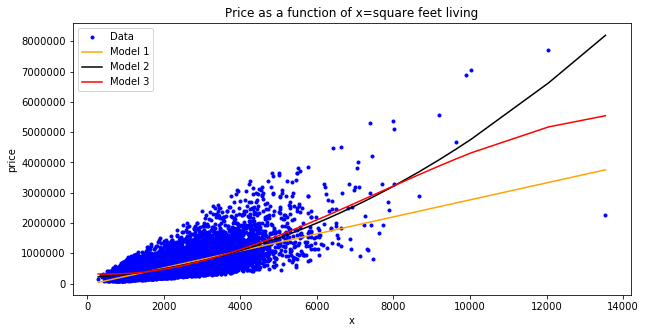

In [63]:
y2=model2.predict(poly2_data[["x","x^2"]])
y3=model3.predict(poly3_data[["x","x^2","x^3"]])
plt.figure(figsize=(10,5))
plt.plot(x,y,".",label="Data",color="blue")
plt.plot(x,y1,"-",label="Model 1",color="orange")
plt.plot(x,y2,"-",label="Model 2",color="black")
plt.plot(x,y3,"-",label="Model 3",color="red")
plt.legend()
plt.title("Price as a function of x=square feet living")
plt.xlabel("x")
plt.ylabel("price")

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [64]:
#Make a 15 degree polynomial data frame with sales[‘sqft_living’] as the the feature. Call it ‘poly15_data’
poly15_data=polynomial_df(sales["sqft_living"],15)
#Add sales[‘price’] to poly15_data as this will be our output variable
poly15_data["price"]=sales["price"]

In [68]:
x5=poly15_data[list(poly15_data.columns[:-1])]
model15=LinearRegression().fit(x5,y)

In [69]:
model15.coef_

array([  4.56404164e-91,   6.91711930e-51,  -5.84644714e-56,
        -4.97841222e-60,   0.00000000e+00,   2.68575170e-71,
         2.26147568e-67,   1.85900299e-63,   1.47144116e-59,
         1.09771012e-55,   7.43509038e-52,   4.23015578e-48,
         1.61618577e-44,  -2.49283826e-48,   9.59718336e-53])

In [72]:
model15.intercept_

537116.32963773981

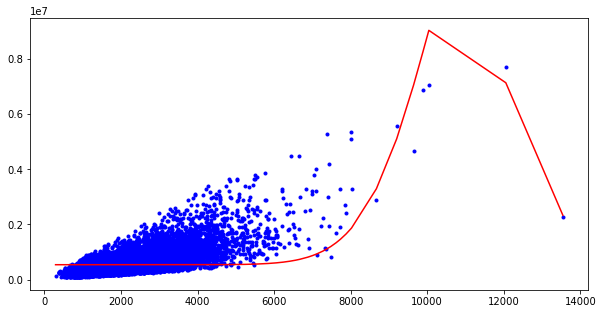

In [71]:
plt.figure(figsize=(10,5))
plt.plot(x,y,".",color="blue")
plt.plot(x,model15.predict(x5),"-",color="red")

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [89]:
poly15_set1=polynomial_df(set_1["sqft_living"],15)
poly15_set1["price"]=set_1.price
x15_set1=poly15_set1[poly15_set1.columns[poly15_set1.columns!="price"]]

poly15_set2=polynomial_df(set_2["sqft_living"],15)
poly15_set2["price"]=set_2.price
x15_set2=poly15_set2[poly15_set2.columns[poly15_set2.columns!="price"]]

poly15_set3=polynomial_df(set_3["sqft_living"],15)
poly15_set3["price"]=set_3.price
x15_set3=poly15_set3[poly15_set3.columns[poly15_set3.columns!="price"]]

poly15_set4=polynomial_df(set_4["sqft_living"],15)
poly15_set4["price"]=set_4.price
x15_set4=poly15_set4[poly15_set4.columns[poly15_set4.columns!="price"]]

In [91]:
model15_set1=LinearRegression().fit(x15_set1,set_1.price)
model15_set2=LinearRegression().fit(x15_set2,set_2.price)
model15_set3=LinearRegression().fit(x15_set3,set_3.price)
model15_set4=LinearRegression().fit(x15_set4,set_4.price)

(0, 14000)

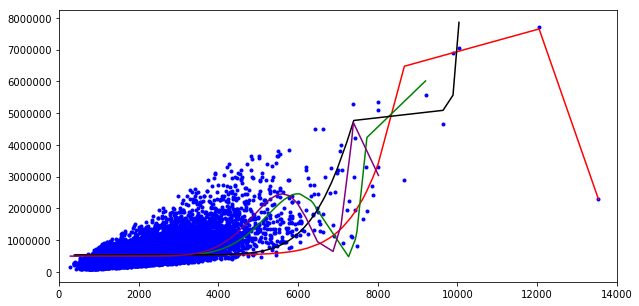

In [97]:
plt.figure(figsize=(10,5))
plt.plot(x,y,".",color="blue")
plt.plot(x15_set1,model15_set1.predict(x15_set1),"-",color="red")
plt.plot(x15_set2,model15_set2.predict(x15_set2),"-",color="green")
plt.plot(x15_set3,model15_set3.predict(x15_set3),"-",color="black")
plt.plot(x15_set4,model15_set4.predict(x15_set4),"-",color="purple")
plt.xlim(0,14000)

In [102]:
print(model15_set1.coef_,"\n")
print(model15_set2.coef_,"\n")
print(model15_set3.coef_,"\n")
print(model15_set4.coef_,"\n")

[  3.05794168e-90  -1.69394900e-49   2.35908952e-55   0.00000000e+00
   0.00000000e+00   1.10358351e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52] 

[  2.71335943e-77   7.33542374e-39  -1.85052450e-44   1.39207183e-49
   0.00000000e+00   0.00000000e+00   3.64549213e-55   1.50416255e-51
   5.76015653e-48   1.95770493e-44   5.39396528e-41   9.40376341e-38
  -3.63529134e-41   4.65476514e-45  -1.97197311e-49] 

[  2.83751934e-88  -7.80224148e-49  -1.38766438e-55   3.98272978e-59
   0.00000000e+00   4.27894986e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51] 

[  1.37116050e-76   2.79678944e-40  -4.25065052e-44   6.08163411e-50
   0.00000000e+00   0.00000000e+00   1.27070051e-54   4.87868972e-51
   1.73549022e-47   5.47058320e-44   1.39587599e-40   2.25041871e-37
  -9.43

## Cross Validation
Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree.

Now for each degree from 1 to 15:

Build a polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
    
Add training_data[‘price’] as a column to your polynomial data set

Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree

Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [112]:
def rss(ytrue,ypredict):
    return ((ytrue-ypredict)**2).sum()

In [127]:
first_poly=polynomial_df(train_df["sqft_living"],1)
first_model=LinearRegression().fit(np.array(first_poly["x"]).reshape(-1,1),y)
model_list=[first_model,]
rss_list=[rss(validation_df.price,first_model.predict(polynomial_df(validation_df["sqft_living"],1))),]
rss_test_list=[rss(test_df.price,first_model.predict(polynomial_df(test_df["sqft_living"],1))),]
for degree in range(2,16):
    poly=polynomial_df(train_df["sqft_living"],degree)
    y=train_df.price
    x_valid=polynomial_df(validation_df["sqft_living"],degree)
    x_test=polynomial_df(test_df["sqft_living"],degree)
    model=LinearRegression().fit(poly,y)
    model_list.append(model)
    rss_list.append(rss(validation_df.price,model.predict(x_valid)))
    rss_test_list.append(rss(test_df.price,model.predict(x_test)))
    

In [134]:
rss_df=pd.DataFrame({"Degree_Model":list(range(1,16)),"RSS":rss_list})

In [135]:
#Sort the rss data frame by RSS so that we can see which model had the lowest RSS on the validation set
rss_df.sort_values("RSS")

,Degree_Model,RSS
5,6,5.662686e+14
1,2,6.239551e+14
2,3,6.258203e+14
4,5,6.282384e+14
0,1,6.290979e+14
3,4,6.299873e+14
6,7,1.073846e+15
7,8,7.087929e+15
8,9,4.530319e+16
9,10,2.475506e+17


The sixth degree model was the most successful. Let's choose this model as the best. Let us check the rss of this model, and out of curiosity, let us check the rss scores of the other models on the test data to see if this was indeed the best choice (at least on the test data)

In [137]:
rss_df["RSS_Test"]=rss_test_list
rss_df.sort_values("RSS_Test").head()

,Degree_Model,RSS,RSS_Test
6,7,1.073846e+15,1.330473e+14
7,8,7.087929e+15,1.348738e+14
5,6,5.662686e+14,1.352251e+14
3,4,6.299873e+14,1.353827e+14
4,5,6.282384e+14,1.354958e+14


# Conclusion

Based on cross validation scores, we judged the sixth degree polynomial feature model to be the most accurate (least residual sum of squares value). However, other models yielded similar scores, including the linear model.